#### <center> Objective-1 [Prepare and Explore the Data] </center>
Your first objective is to prepare the data for modelling, explore the target ('mpg') and other features in the dataset, and fix any issues you encounter. <br>
**Tasks**:
1. Read in the auto-mpg.csv dataset, and check datatypes and columns for missing or unusual values.
2. Convert ‘origin’ to a categorical feature.
3. Calculate summary statistics for each of the numeric columns in the dataset including min, max and mean, then build a histogram of the target variable (‘mpg’).
4. Explore relationships between the features and the ‘mpg’ column, and use scatterplots and build a correlation heatmap. Which column is most strongly correlated with ‘mpg’?

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import r2_score as r2s, mean_absolute_error as mae
import statsmodels.api as sm


In [2]:
mpg_df = pd.read_csv('auto-mpg.csv')
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
mpg_df['origin'] = mpg_df['origin'].astype('object')
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 28.1+ KB


In [5]:
mpg_df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [6]:
mpg_df.query("horsepower == '?'")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [7]:
mpg_df['horsepower'] = pd.to_numeric(mpg_df['horsepower'], errors = 'coerce')
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
mpg_df['horsepower'] = mpg_df['horsepower'].fillna(mpg_df['horsepower'].mean())
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
mpg_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


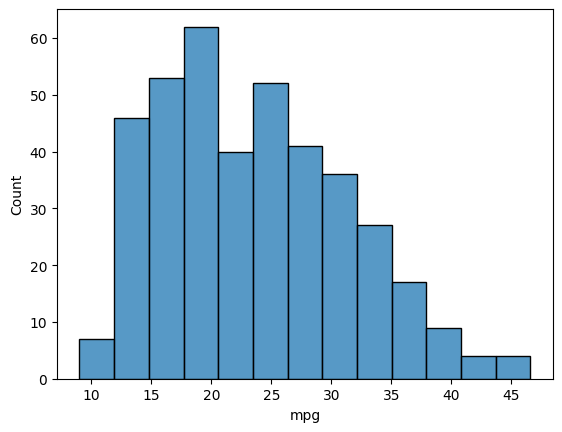

In [10]:
sns.histplot(mpg_df.mpg)
plt.savefig('histogram_mpg.png', dpi=300)
plt.show()

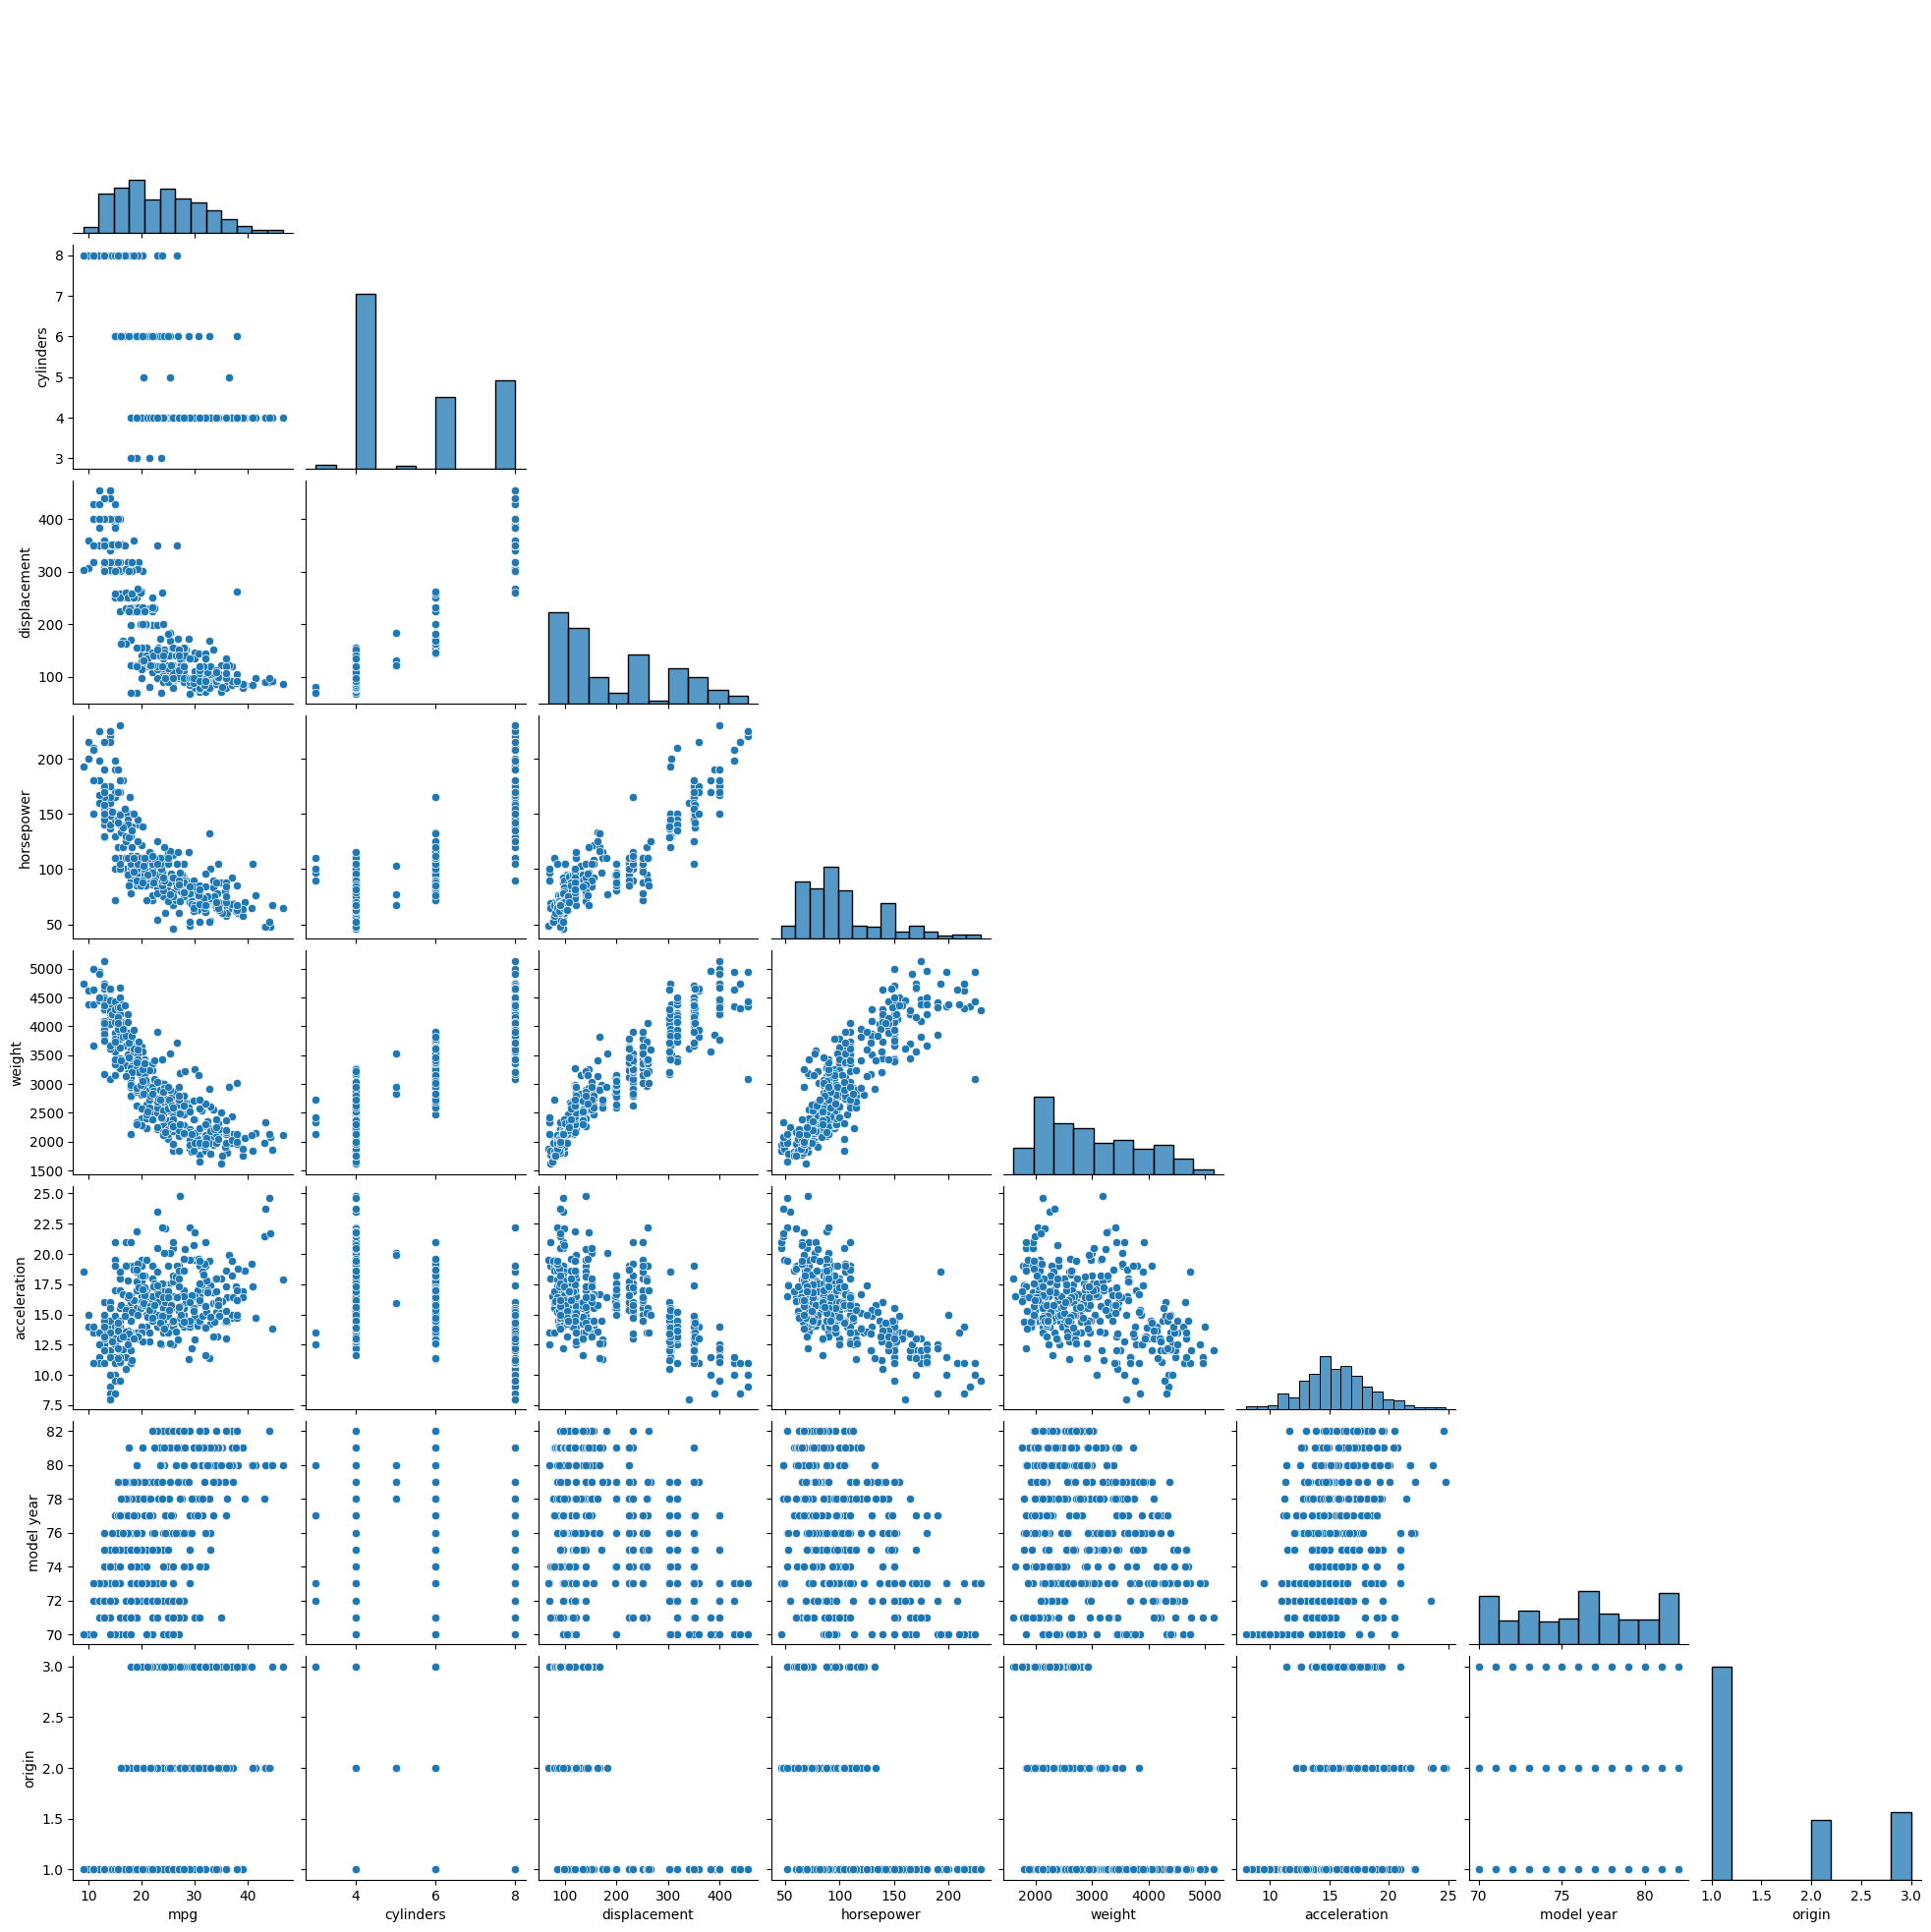

In [11]:
sns.pairplot(mpg_df, corner = True)
plt.savefig('pairplot_mpg.png', dpi=300)
plt.show()

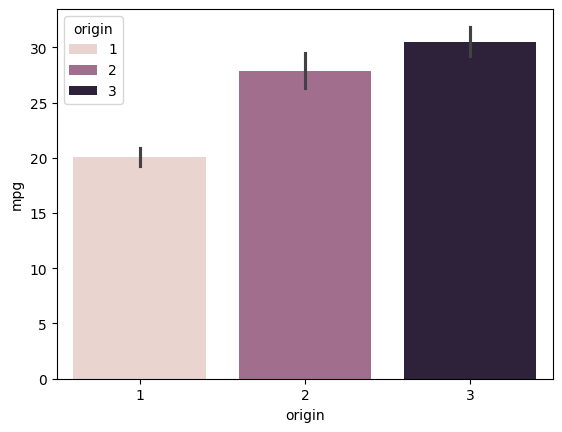

In [12]:
sns.barplot(data=mpg_df, x='origin', y='mpg', hue='origin')
plt.savefig('barplot_mpg_origin.png', dpi=300)
plt.show()

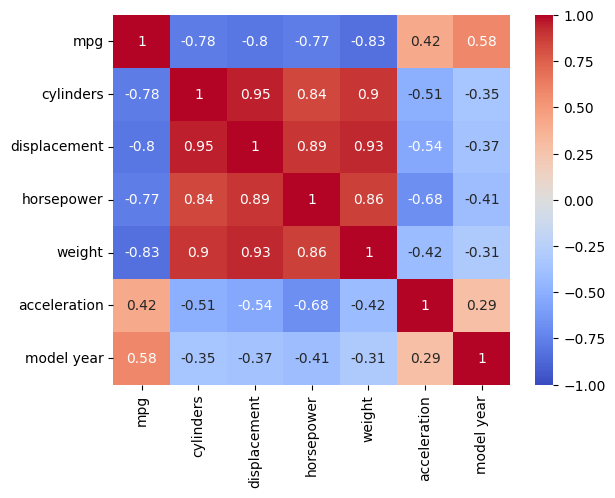

In [13]:
sns.heatmap(
    mpg_df.corr(numeric_only=True),
    vmin = -1,
    vmax = 1,
    cmap = 'coolwarm',
    annot = True
)
plt.savefig('heatmap_corr.png', dpi=300)
plt.show()

#### <center>Objective-2 [Split the data and build a multiple regression model]</center>
Your second objective is to split the data into training and test data, then fit a multiple regression model using the validation scheme of your choice. Perform feature engineering and variable selection, and check whether any assumptions are violated. <br>
**Tasks**:
1. Split the data into train and test, then then set up a validation scheme of your choice.
2. Fit a baseline regression model using the feature with the strongest correlation to the target (‘mpg’).
3. Fit a multiple regression model. Perform any feature selection and feature engineering necessary, fixing any violated assumptions along the way.

In [14]:
mpg_model = mpg_df.assign(
    weight2 = mpg_df.weight ** 2,
    weight3 = mpg_df.weight ** 3,
    accel2 = mpg_df.acceleration ** 2,
    accel3 = mpg_df.acceleration ** 2,
    hp2 = mpg_df.horsepower ** 2,
    hp3 = mpg_df.horsepower ** 2,
).drop("car name", axis = 1)
mpg_model = pd.get_dummies(mpg_model, drop_first=True)


In [15]:
mpg_model.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,weight2,weight3,accel2,accel3,hp2,hp3,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,12278016,43022168064,144.00,144.00,16900.0,16900.0,False,False
1,15.0,8,350.0,165.0,3693,11.5,70,13638249,50366053557,132.25,132.25,27225.0,27225.0,False,False
2,18.0,8,318.0,150.0,3436,11.0,70,11806096,40565745856,121.00,121.00,22500.0,22500.0,False,False
3,16.0,8,304.0,150.0,3433,12.0,70,11785489,40459583737,144.00,144.00,22500.0,22500.0,False,False
4,17.0,8,302.0,140.0,3449,10.5,70,11895601,41027927849,110.25,110.25,19600.0,19600.0,False,False


In [16]:
mpg_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   weight2       398 non-null    int64  
 8   weight3       398 non-null    int64  
 9   accel2        398 non-null    float64
 10  accel3        398 non-null    float64
 11  hp2           398 non-null    float64
 12  hp3           398 non-null    float64
 13  origin_2      398 non-null    bool   
 14  origin_3      398 non-null    bool   
dtypes: bool(2), float64(8), int64(5)
memory usage: 41.3 KB


In [17]:
mpg_model[['origin_2', 'origin_3']] = mpg_model[['origin_2', 'origin_3']].astype(int)
mpg_model.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,weight2,weight3,accel2,accel3,hp2,hp3,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,12278016,43022168064,144.00,144.00,16900.0,16900.0,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,13638249,50366053557,132.25,132.25,27225.0,27225.0,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,11806096,40565745856,121.00,121.00,22500.0,22500.0,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,11785489,40459583737,144.00,144.00,22500.0,22500.0,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,11895601,41027927849,110.25,110.25,19600.0,19600.0,0,0


In [18]:
features = [
    'weight', 'weight2', 
    'cylinders', 'displacement', 
    'horsepower', 'hp2', 'hp3',
    'acceleration', 'accel2', 'accel3',
    'model year', 'origin_2', 'origin_3'
]
X = sm.add_constant(mpg_model[features])
y = mpg_model['mpg']

X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [19]:
kf = KFold(n_splits=5, shuffle=True, random_state=2023)

# Create a list to store validation scores for each fold
cv_lm_r2s = []
cv_lm_mae = []

for train_ind, val_ind in kf.split(X, y):
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    model = sm.OLS(y_train, X_train).fit()
    cv_lm_r2s.append(r2s(y_val, model.predict(X_val)))
    cv_lm_mae.append(mae(y_val, model.predict(X_val)))

print(f"All Validation r2-Scores: {[round(x, 3) for x in cv_lm_r2s]}")
print(f"Cross-Val r2-Scores: {round(np.mean(cv_lm_r2s),3)} +- {round(np.std(cv_lm_r2s),3)}")

print(f"All Validation MAEs: {[round(x, 3) for x in cv_lm_mae]}")
print(f"Cross-Val MAEs: {round(np.mean(cv_lm_mae),3)} +- {round(np.std(cv_lm_mae),3)}")

All Validation r2-Scores: [0.889, 0.866, 0.846, 0.85, 0.863]
Cross-Val r2-Scores: 0.863 +- 0.015
All Validation MAEs: [1.814, 2.109, 2.312, 2.099, 2.288]
Cross-Val MAEs: 2.124 +- 0.178


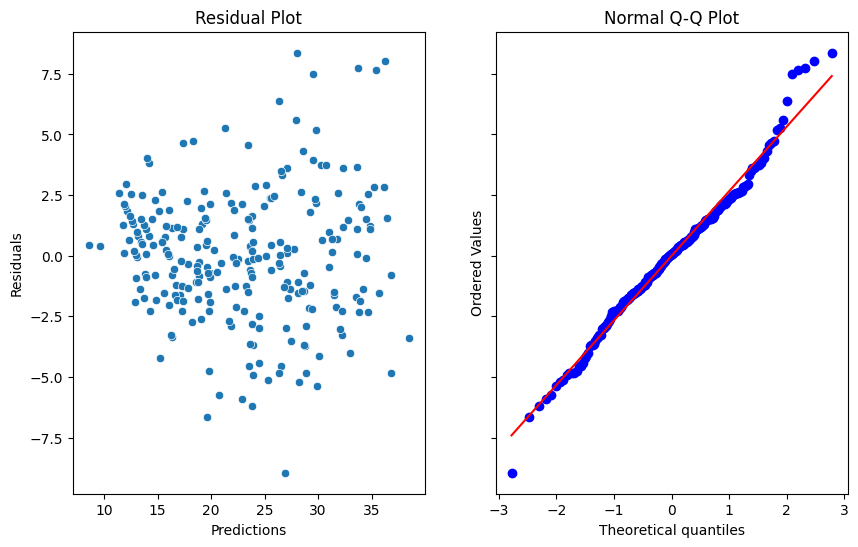

In [20]:
def residual_analysis_plots(model):
    pred = model.predict()
    resd = model.resid

    fig, ax = plt.subplots(1, 2, sharey='all', figsize=(10, 6))

    sns.scatterplot(x=pred, y=resd, ax=ax[0])
    ax[0].set_title("Residual Plot")
    ax[0].set_xlabel("Predictions")
    ax[0].set_ylabel("Residuals")

    sts.probplot(resd, dist='norm', plot=ax[1])
    ax[1].set_title("Normal Q-Q Plot")

residual_analysis_plots(model)
plt.savefig('model_plots.png', dpi=300)
plt.show()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     154.4
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          6.37e-103
Time:                        23:31:13   Log-Likelihood:                -611.35
No. Observations:                 255   AIC:                             1247.
Df Residuals:                     243   BIC:                             1289.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           16.5261      7.488      2.207      0.028       1.776      31.277
weight          -0.0165      0.002     -6.674      0.000      -0.021      -0.012
weight2       1.849e-06   3.44e-07      5.369      0.000    1.17e-06    2.53e-06
cylinders        0.1516      0.345      0.439      0.661      -0.529       0.832
displacement    -0.0026      0.009     -0.281      0.779      -0.021       0.016
horsepower      -0.1272      0.045     -2.802      0.005      -0.217      -0.038
hp2              0.0002    7.7e-05      2.086      0.038    8.93e-06       0.000
hp3              0.0002    7.7e-05      2.086      0.038    8.93e-06       0.000
acceleration    -1.8617      0.659     -2.825      0.005      -3.160      -0.564
accel2           0.0246      0.010      2.523      0.012       0.005       0.044
accel3           0.0246      0.010      2.523      0.012       0.005       0.044
model year       0.8378      0.054     15.649      0.000       0.732       0.943
origin_2         1.3598      0.620      2.193      0.029       0.138       2.581
origin_3         0.7819      0.617      1.267      0.206      -0.434       1.997
==============================================================================
Omnibus:                        6.692   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                9.769
Skew:                           0.126   Prob(JB):                      0.00756
Kurtosis:                       3.925   Cond. No.                     3.12e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.41e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [22]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     200.5
Date:                Thu, 24 Oct 2024   Prob (F-statistic):          1.04e-132
Time:                        23:31:14   Log-Likelihood:                -776.08
No. Observations:                 318   AIC:                             1576.
Df Residuals:                     306   BIC:                             1621.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           21.8915      7.058      3.102      0.002       8.004      35.779
weight          -0.0169      0.002     -7.263      0.000      -0.021      -0.012
weight2       1.928e-06   3.24e-07      5.959      0.000    1.29e-06    2.56e-06
cylinders        0.2544      0.325      0.783      0.434      -0.385       0.894
displacement    -0.0068      0.009     -0.783      0.434      -0.024       0.010
horsepower      -0.1243      0.042     -2.986      0.003      -0.206      -0.042
hp2              0.0002   7.04e-05      2.205      0.028    1.67e-05       0.000
hp3              0.0002   7.04e-05      2.205      0.028    1.67e-05       0.000
acceleration    -2.5015      0.594     -4.214      0.000      -3.670      -1.333
accel2           0.0348      0.009      4.027      0.000       0.018       0.052
accel3           0.0348      0.009      4.027      0.000       0.018       0.052
model year       0.8364      0.050     16.805      0.000       0.738       0.934
origin_2         1.2468      0.579      2.154      0.032       0.108       2.386
origin_3         1.1741      0.558      2.106      0.036       0.077       2.271
==============================================================================
Omnibus:                       19.064   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.542
Skew:                           0.298   Prob(JB):                     2.59e-09
Kurtosis:                       4.622   Cond. No.                     3.53e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.11e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### <center>Objective-3 [Evaluate model test performance and interpret the model]</center>
Score your model on the test data set, use your model to predict a new batch of cars, and interpret your model results. <br>
**Tasks**:
1. Score your final model on the test set, calculating both R2 and MAE. If your test R2 is less than 8, revisit the modelling process.
2. Interpret your model. What impact does a one-year increase in model year have on the predicted mileage?
3. BONUS: Repeat the modelling process using ridge regression. How much better was the ridge model than traditional regression, if at all?

In [23]:
r2s_score = r2s(y_val, model.predict(X_val),)
mae_score = mae(y_val, model.predict(X_val),)
print("Test R2 : {}".format(r2s_score), "Test MAE : {}".format(mae_score), sep='\n')

Test R2 : 0.8748189698628868
Test MAE : 2.1947471832283187


In [24]:
# Ridge Regression Modelling
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_m = std.fit_transform(X.values)
X_t = std.transform(X_test.values)

In [25]:
from sklearn.linear_model import RidgeCV
n_alphas = 200
alphas = 10 ** np.linspace(-3, 3, n_alphas)

ridge_model = RidgeCV(alphas = alphas, cv = 5)
ridge_model.fit(X_m, y)
print(ridge_model.score(X_m, y))
print(mae(y, ridge_model.predict(X_m)))
print(ridge_model.alpha_)

0.8781604333320855
2.0614650307612017
0.026126752255633278


In [26]:
r2s_score = r2s(y_val, ridge_model.predict(X_val),)
mae_score = mae(y_val, ridge_model.predict(X_val),)
print("Test R2 : {}".format(r2s_score), "Test MAE : {}".format(mae_score), sep='\n')

Test R2 : -117341842216861.0
Test MAE : 81713306.90523586


c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
